In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

climate_data = pd.read_csv('D:\\\\BelajarML\\\\dataset\\\\climate_change_indicators.csv')
climate_data

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [46]:
climate_data = climate_data.dropna()

In [47]:
climate_data[climate_data.duplicated()]

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022


In [48]:
climate_data.describe()

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,110.647436,0.191115,-0.013436,-0.016237,-0.077577,-0.239186,0.130468,-0.102654,-0.201904,0.151449,...,0.889071,1.089949,1.223365,1.401346,1.269795,1.236853,1.385115,1.481904,1.360699,1.333788
std,64.473531,0.427485,0.367600,0.411796,0.329208,0.284645,0.402946,0.366388,0.288914,0.323968,...,0.304310,0.533827,0.442040,0.382704,0.416590,0.545875,0.417424,0.525409,0.504987,0.652895
min,1.000000,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,57.750000,-0.090500,-0.183250,-0.211000,-0.258000,-0.392500,-0.044500,-0.271750,-0.351000,-0.053000,...,0.714750,0.773500,1.017750,1.128500,1.021250,0.849500,1.157500,1.155000,1.017250,0.874750
50%,105.500000,0.070500,-0.070500,-0.042000,-0.052000,-0.220500,0.116000,-0.131500,-0.175000,0.203000,...,0.863500,0.957500,1.192000,1.406000,1.247500,1.097000,1.378500,1.425000,1.326000,1.274000
75%,163.250000,0.361250,0.141500,0.236250,0.132500,-0.077750,0.323750,0.032000,-0.066750,0.382250,...,1.100500,1.310000,1.454250,1.661500,1.539250,1.500250,1.617750,1.741500,1.663750,1.749750
max,225.000000,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.832000,...,1.642000,2.704000,2.613000,2.381000,2.493000,2.524000,2.652000,3.317000,2.676000,3.243000


In [49]:
climate_data.isnull()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
219,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
220,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
223,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
climate_data.isna

<bound method DataFrame.isna of      ObjectId                       Country ISO2 ISO3  \
0           1  Afghanistan, Islamic Rep. of   AF  AFG   
1           2                       Albania   AL  ALB   
2           3                       Algeria   DZ  DZA   
4           5      Andorra, Principality of   AD  AND   
5           6                        Angola   AO  AGO   
..        ...                           ...  ...  ...   
218       219     Wallis and Futuna Islands   WF  WLF   
219       220            West Bank and Gaza   PS  PSE   
220       221                Western Sahara   EH  ESH   
223       224                        Zambia   ZM  ZMB   
224       225                      Zimbabwe   ZW  ZWE   

                                             Indicator            Unit  \
0    Temperature change with respect to a baseline ...  Degree Celsius   
1    Temperature change with respect to a baseline ...  Degree Celsius   
2    Temperature change with respect to a baseline ...  Degre

In [51]:
climate_data

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
5,6,Angola,AO,AGO,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.044,0.828,1.331,1.609,0.870,1.395,1.752,1.162,1.553,1.212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,Wallis and Futuna Islands,WF,WLF,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.773,0.686,0.724,1.267,1.062,0.920,1.379,1.274,1.029,0.951
219,220,West Bank and Gaza,PS,PSE,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.114,0.863,1.326,1.615,0.735,2.007,1.204,1.455,1.787,1.074
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [52]:
climate_data = climate_data.drop(
    columns=['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name',
             'CTS_Full_Descriptor', 'F1961', 'F1962',
             'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
             'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
             'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
             'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
             'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
             'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
             'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
             'F2019', ])

In [53]:
climate_data = climate_data.drop_duplicates()
climate_data[climate_data.duplicated()]

,F2020,F2021,F2022


[147.78306270967744, 75.2213114359649, 56.62471702221089, 46.03884367094017, 37.861084046971705, 31.8794290299085, 28.663852156748685, 24.443688037390608, 21.673091948179785]


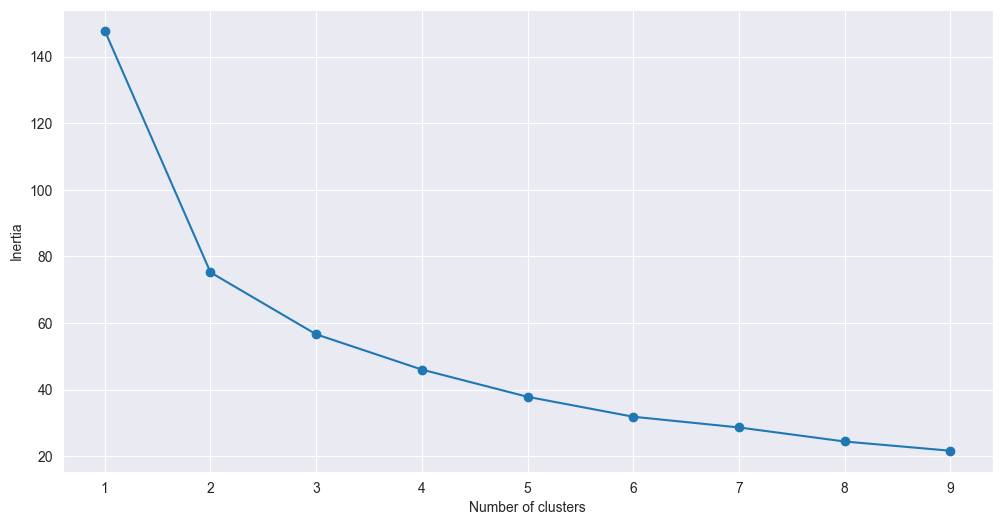

In [64]:
SSE = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, n_init=10, random_state=84)
    kmeans.fit(climate_data)
    SSE.append(kmeans.inertia_)
    centroid = kmeans.cluster_centers_
frame = pd.DataFrame({'Cluster': range(1, 10), 'SSE': SSE})
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
print(SSE)

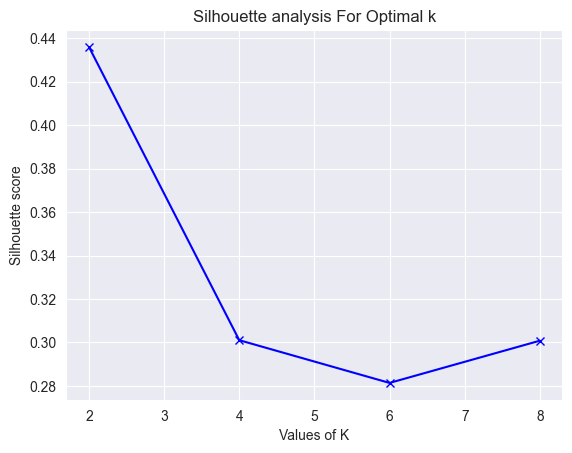

,K,S
0,2,0.435980
1,4,0.301062
2,6,0.281401
3,8,0.300831


In [55]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 4, 6, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    kmeans.fit(climate_data)
    cluster_labels = kmeans.labels_
    #silhouette score
    silhouette_avg.append(silhouette_score(climate_data, cluster_labels, metric='euclidean'))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()
datas = pd.DataFrame({'K': range_n_clusters, 'S': silhouette_avg})
datas

In [56]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(climate_data)
pred = kmeans.predict(climate_data)
print(pred)
climate_data.corr()

[0 2 2 1 0 0 0 0 1 0 2 0 0 0 2 0 0 0 0 2 2 0 0 0 2 0 0 0 2 2 0 2 0 2 2 1 0
 0 0 0 0 0 0 0 1 1 0 0 2 1 0 1 0 2 0 0 0 0 2 0 0 2 0 1 0 0 0 2 2 0 0 2 1 0
 2 0 2 2 2 0 2 0 2 0 1 0 0 2 0 2 0 2 0 0 1 1 1 0 2 0 1 1 0 0 0 0 1 0 0 0 0
 0 2 1 1 0 2 1 2 2 1 2 2 0 2 0 1 0 0 0 0 1 1 2 2 0 0 0 0 0 2 2 2 0 0 0 0 0
 0 0 0 2 1 0 0]


,F2020,F2021,F2022
F2020,1.000000,0.453558,0.691542
F2021,0.453558,1.000000,0.576556
F2022,0.691542,0.576556,1.000000


In [57]:
climate_data['Clusters'].value_counts()

KeyError: 'Clusters'

In [ ]:
plt.figure(figsize=(10, 10), facecolor="white")
sns.scatterplot(climate_data, x=climate_data['F2021'], y=climate_data['F2022'], c=kmeans.labels_)
plt.axhline(
    0, 0, 1,
    color="red", linestyle="--", alpha=0.5
)
plt.axvline(
    0, 0, 1,
    color="red", linestyle="--", alpha=0.5
)
plt.show()

In [58]:
climate_data.info

<bound method DataFrame.info of      F2020  F2021  F2022
0    0.498  1.327  2.012
1    1.498  1.536  1.518
2    1.926  2.330  1.688
4    2.562  1.533  3.243
5    1.162  1.553  1.212
..     ...    ...    ...
218  1.274  1.029  0.951
219  1.455  1.787  1.074
220  2.069  1.593  1.970
223  0.891  0.822  0.686
224  0.389 -0.125 -0.490

[155 rows x 3 columns]>

<Axes: xlabel='F2020', ylabel='F2022'>

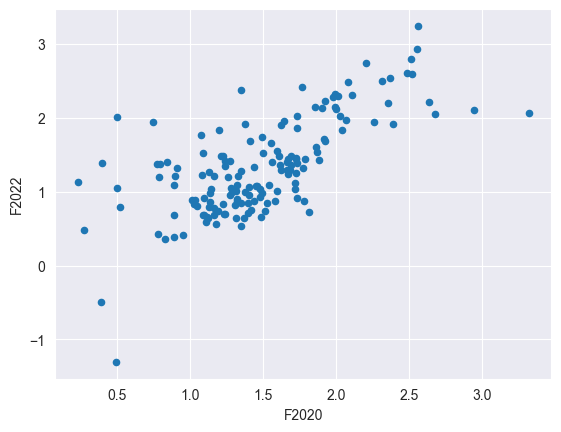

In [63]:
climate_data.plot(
    kind='scatter',
    x='F2020',
    y='F2022'
)

In [60]:
climate_data.head()

,F2020,F2021,F2022
0,0.498,1.327,2.012
1,1.498,1.536,1.518
2,1.926,2.330,1.688
4,2.562,1.533,3.243
5,1.162,1.553,1.212


<Axes: >

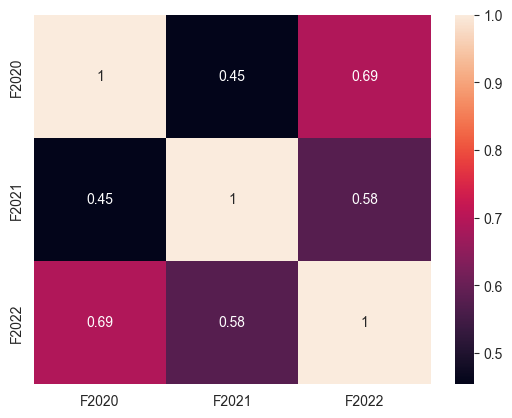

In [61]:
sns.heatmap(climate_data.corr() , annot=True)